# Comparaison des Modèles YOLO

Ce notebook permet de charger les résultats de validation des différents modèles YOLO (v8, v10, v11) et de générer des graphiques de comparaison pour le mémoire.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import re

# Configuration du style pour des graphiques scientifiques
sns.set_theme(style="whitegrid", context="paper", font_scale=1.2)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

## Chargement des Données

Nous allons lire tous les fichiers CSV du dossier courant et extraire les informations pertinentes.

In [19]:
def parse_filename(filename):
    """Extract model info from filename."""
    # Normalisation du nom de fichier pour gérer les typos et variations
    name = os.path.basename(filename).replace('.csv', '')
    
    # Regex pour capturer la version, la taille et si c'est pré-entraîné
    # Exemples: yolov11s.csv, yolov11s-petrain.csv, yolov8m_pretrain.csv
    match = re.search(r'(yolov\d+)([sm])', name)
    
    if match:
        version = match.group(1).upper() # ex: YOLOV11
        size = match.group(2).upper()    # ex: S
        model_name = f"{version}{size}"
    else:
        model_name = name
        version = "Unknown"
        size = "Unknown"
    
    # Détection du pré-entraînement
    is_pretrained = 'pretrain' in name or 'petrain' in name
    training_type = "Pretrained" if is_pretrained else "Scratch"
    
    return model_name, version, size, training_type

data = []
csv_files = glob.glob("*.csv")
csv_files = [f for f in csv_files if not f.endswith("all_results.csv")]

for file in csv_files:
    try:
        df = pd.read_csv(file)
        # On suppose qu'il n'y a qu'une ligne de données pertinente ou on prend la moyenne
        # Le fichier semble avoir une ligne de données
        row = df.iloc[0]
        
        name, version, size, training_type = parse_filename(file)
        data.append({
            'Model': name,
            'Version': version,
            'Size': size,
            'Training': training_type,
            'mAP50-95': row.get('map50_95_mean', 0),
            'mAP50': row.get('map50_mean', 0),
            'mAP75': row.get('map75_mean', 0),
            'Precision': row.get('precision_mean', 0),
            'Recall': row.get('recall_mean', 0),
            'F1': row.get('f1_mean', 0),
            'Inference Time (ms)': row.get('speed_inf_ms_mean', 0),
            'Preprocessing Time (ms)' : row.get('speed_pre_ms_mean', 0),
            'Postprocessing Time (ms)': row.get('speed_post_ms_mean', 0),
            'Total Time (ms)': row.get('speed_total_ms_mean', 0),
            'FPS': row.get('fps_est_mean', 0)
        })
    except Exception as e:
        print(f"Erreur lors de la lecture de {file}: {e}")

results_df = pd.DataFrame(data)
results_df['Model_Label'] = results_df['Version'] + "-" + results_df['Size'] + " (" + results_df['Training'] + ")"
# Trier pour un affichage cohérent
results_df = results_df.sort_values(by=['Version', 'Size', 'Training'])
results_df.to_csv("all_results.csv", index=False)
results_df.head(15)



,Model,Version,Size,Training,mAP50-95,mAP50,mAP75,Precision,Recall,F1,Inference Time (ms),Preprocessing Time (ms),Postprocessing Time (ms),Total Time (ms),FPS,Model_Label
9,YOLOV10M,YOLOV10,M,Pretrained,0.288921,0.410829,0.312664,0.401069,0.389410,0.395154,32.275516,0.756684,0.743998,33.776198,29.606648,YOLOV10-M (Pretrained)
10,YOLOV10M,YOLOV10,M,Scratch,0.243959,0.342655,0.282301,0.413058,0.283487,0.336221,31.979220,0.683156,0.703921,33.366297,29.970362,YOLOV10-M (Scratch)
7,YOLOV10S,YOLOV10,S,Pretrained,0.301040,0.417882,0.346353,0.408398,0.406371,0.407382,14.707139,0.762010,0.710540,16.179689,61.805886,YOLOV10-S (Pretrained)
8,YOLOV10S,YOLOV10,S,Scratch,0.247135,0.362020,0.280673,0.392039,0.315960,0.349912,15.041199,0.742362,0.671531,16.455092,60.771461,YOLOV10-S (Scratch)
0,YOLOV11M,YOLOV11,M,Pretrained,0.312119,0.423245,0.354195,0.414298,0.417084,0.415686,31.934741,0.723946,4.159763,36.818450,27.160296,YOLOV11-M (Pretrained)
5,YOLOV11M,YOLOV11,M,Scratch,0.253762,0.378404,0.294939,0.409285,0.344043,0.373839,32.137882,0.711175,3.462607,36.311665,27.539360,YOLOV11-M (Scratch)
11,YOLOV11S,YOLOV11,S,Pretrained,0.306611,0.422442,0.355407,0.394127,0.414231,0.403929,12.913715,0.732857,6.814599,20.461171,48.873058,YOLOV11-S (Pretrained)
6,YOLOV11S,YOLOV11,S,Scratch,0.246975,0.371285,0.279610,0.400000,0.327634,0.360218,12.734926,0.702136,5.718109,19.155171,52.205224,YOLOV11-S (Scratch)
1,YOLOV8M,YOLOV8,M,Pretrained,0.312308,0.435907,0.357898,0.429715,0.412438,0.420899,18.093454,0.495480,4.481753,23.070688,43.345046,YOLOV8-M (Pretrained)
4,YOLOV8M,YOLOV8,M,Scratch,0.247125,0.374269,0.276921,0.393978,0.354480,0.373187,18.224471,0.459313,4.078802,22.762587,43.931738,YOLOV8-M (Scratch)


In [20]:
VERSION_COLORS = {
    "YOLOV8": "#1f77b4",   # bleu
    "YOLOV10": "#ff7f0e",  # orange
    "YOLOV11": "#2ca02c",  # vert
}

STAGE_COLORS = {
    "Pre-processing":  "#1f77b4",  # violet doux
    "Inference":       "#ff7f0e",  # rouge rosé
    "Post-processing": "#2ca02c",  # turquoise/vert
}


## Comparaison des Performances (mAP)

Comparaison des scores mAP50-95 et mAP50 pour évaluer la précision globale des modèles.

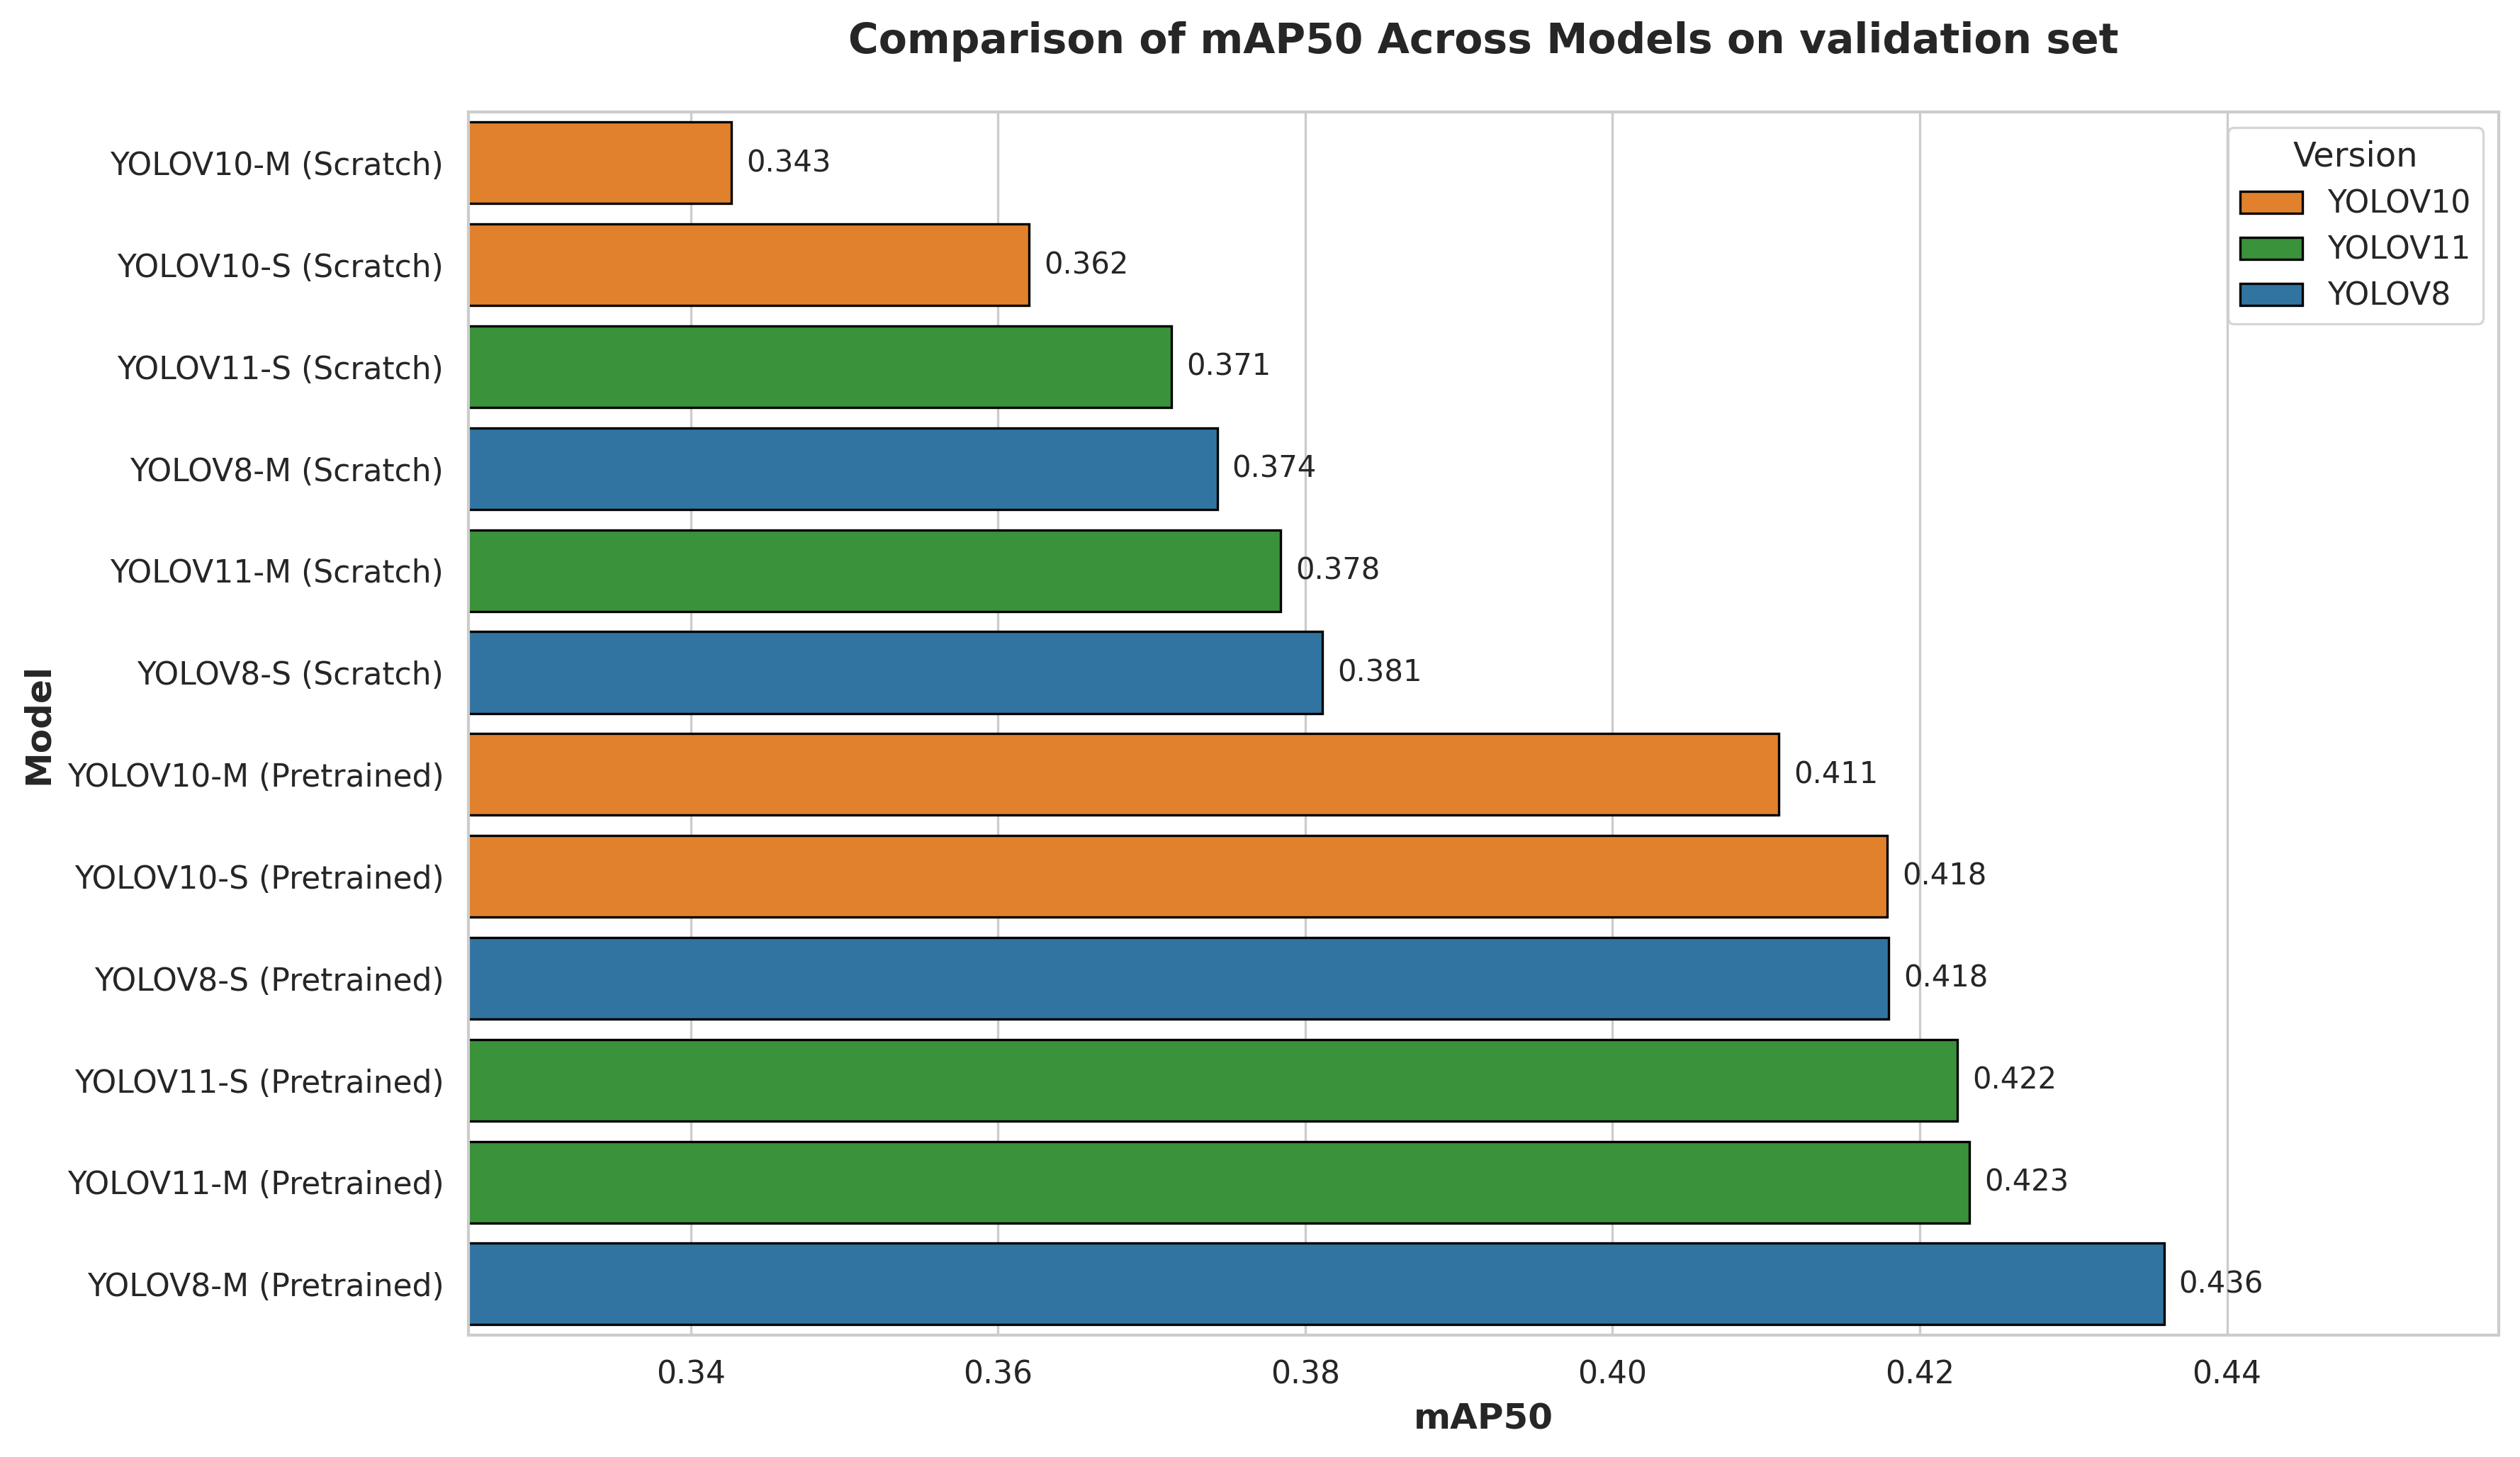

In [21]:
def plot_metric_comparison_zoomed(df, metric, title, ylabel):
    plt.figure(figsize=(12, 7)) 

    # Palette cohérente pour chaque version
    palette = {v: VERSION_COLORS.get(v, "#7f7f7f") for v in df['Version'].unique()}

    df_sorted = df.sort_values(by=metric, ascending=True).reset_index(drop=True)

    min_val = df_sorted[metric].min()
    x_min = max(0, min_val * 0.95)

    ax = sns.barplot(
        data=df_sorted, 
        x=metric,
        y='Model_Label',
        hue='Version',
        palette=palette,      # <<< couleur uniforme et cohérente !
        edgecolor="black",
        dodge=False
    )
    
    if min_val > 0.1:
        ax.set_xlim(x_min)

    plt.title(title, fontweight='bold', pad=20)
    plt.xlabel(ylabel, fontweight='bold')
    plt.ylabel("Model", fontweight='bold')

    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=5, fontsize=10)

    plt.tight_layout()
    plt.savefig("mAP50.pdf", format="pdf", dpi=300, bbox_inches="tight")
    plt.show()
plot_metric_comparison_zoomed(results_df, 'mAP50', 'Comparison of mAP50 Across Models on validation set', 'mAP50')   


## Comparaison Précision, Rappel et F1-Score

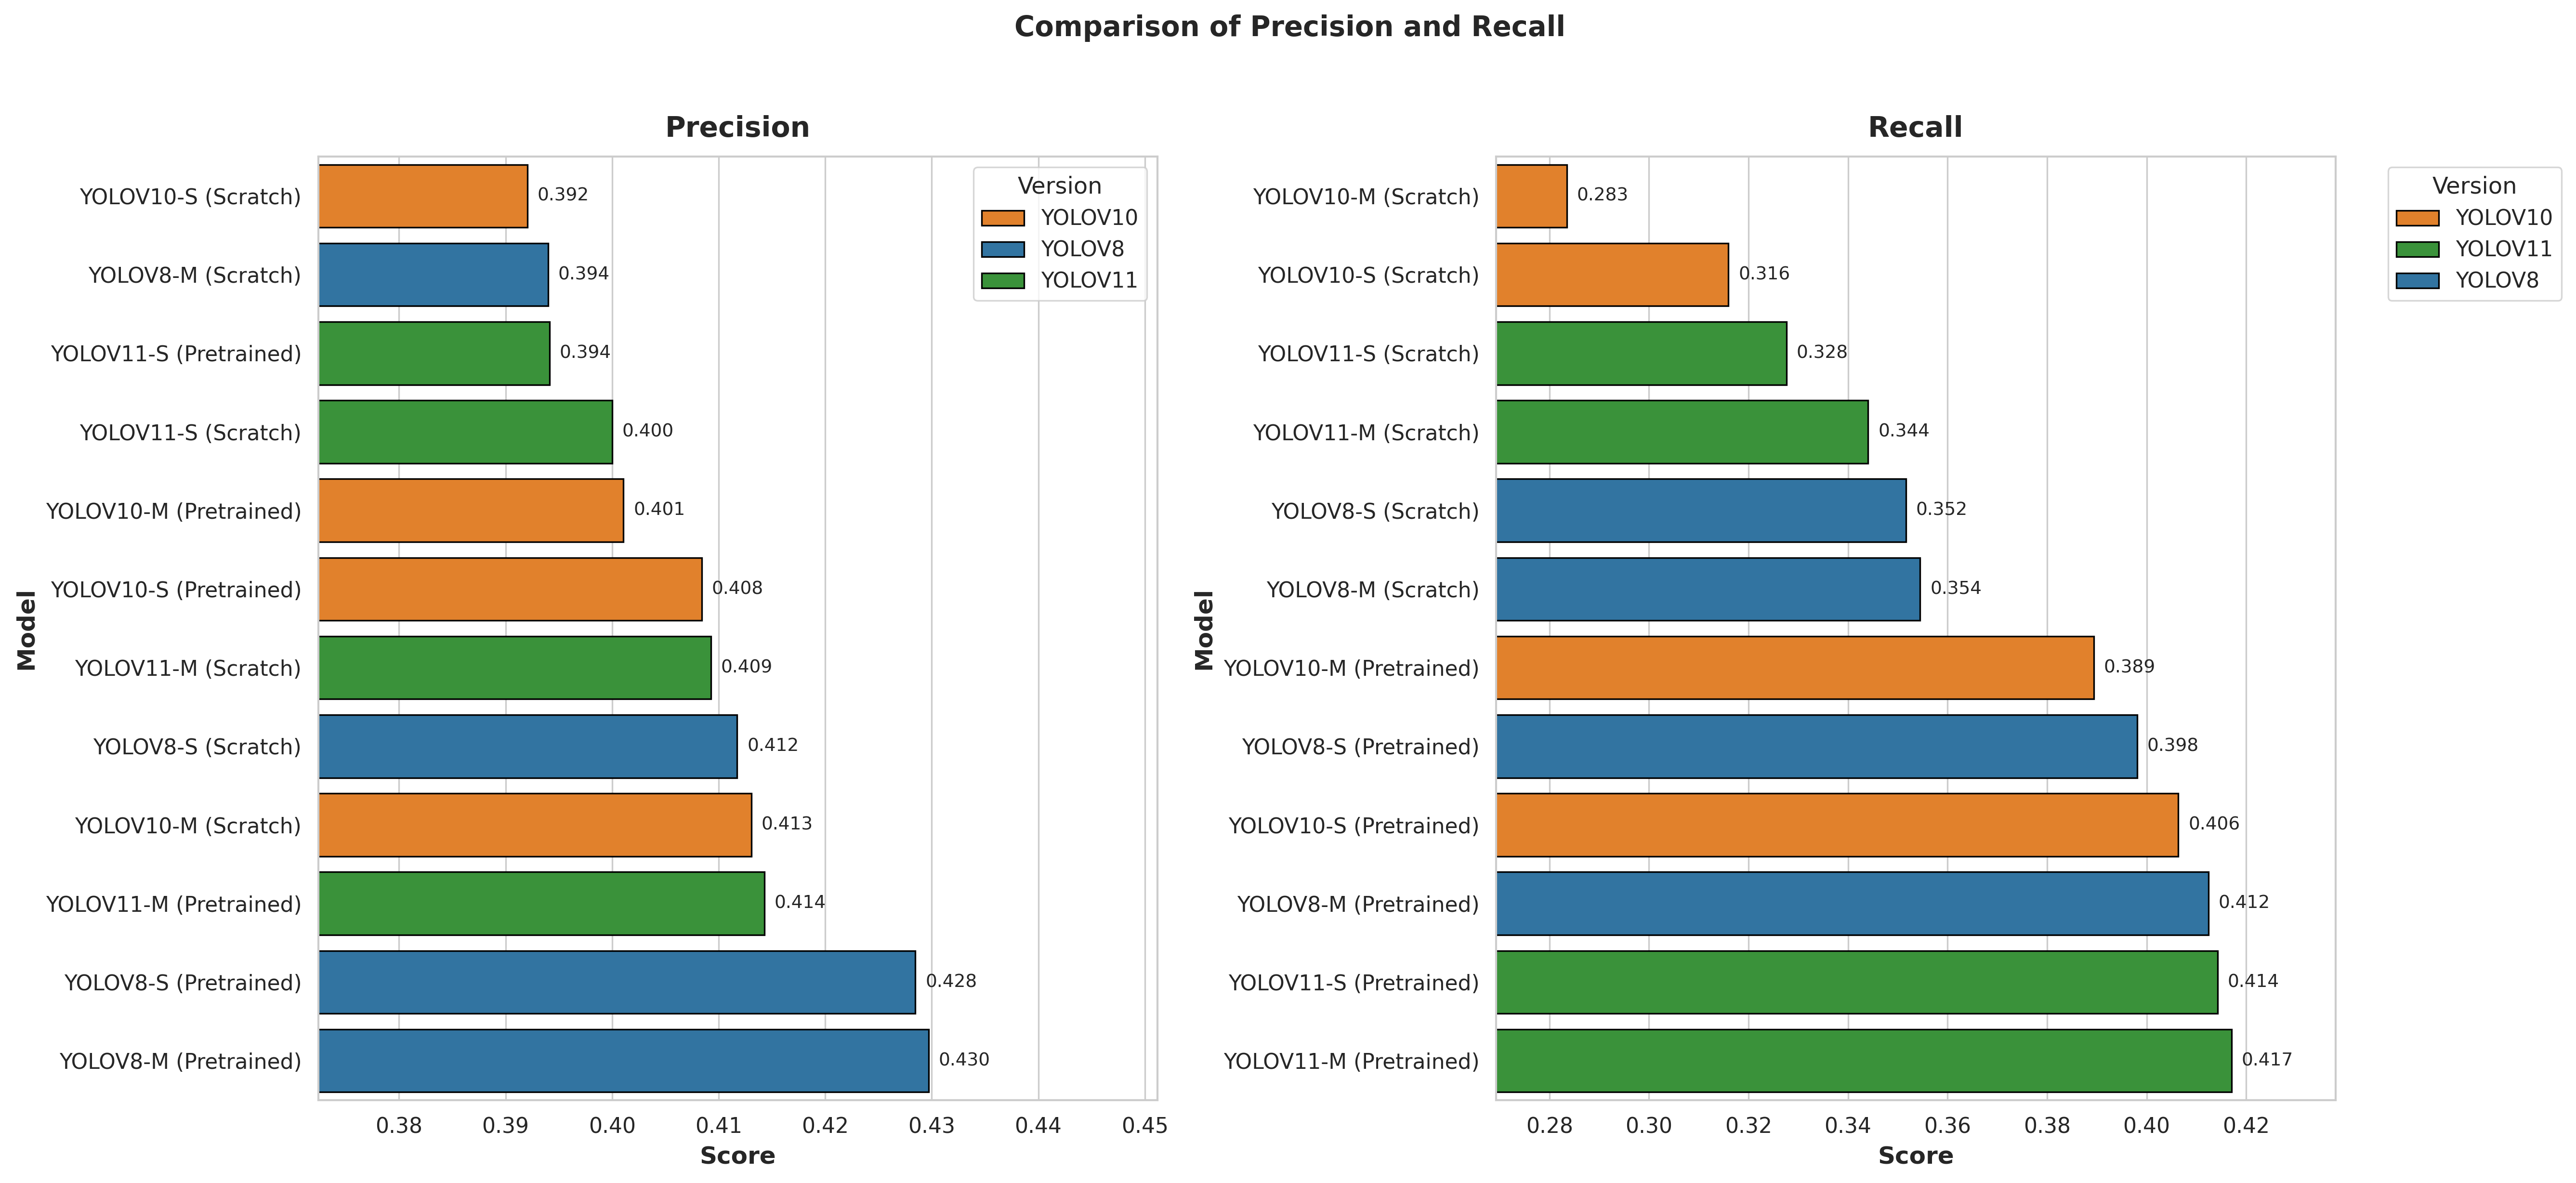

In [22]:


def plot_pr_recall_fixed_labels(df):
    """
    Plots Precision and Recall side-by-side in horizontal bar charts,
    sorted by performance (ascending), zoomed, and ensures Y-axis labels 
    (Model names) are visible on BOTH plots for clarity.
    """
    
    df_plot = df.copy() 
    df_plot['Model_Label'] = df_plot['Version'] + "-" + df_plot['Size'] + " (" + df_plot['Training'] + ")"
    palette = {v: VERSION_COLORS.get(v, "#7f7f7f") for v in df['Version'].unique()}
    metrics = ['Precision', 'Recall']
    english_titles = ['Precision', 'Recall']
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 8)) # Slightly wider figure
    
    # Iterate over both metrics (Precision and Recall)
    for i, metric in enumerate(metrics):
        
        # Sort data for the current metric in ascending order
        df_sorted = df_plot.sort_values(by=metric, ascending=True).reset_index(drop=True)
        
        # --- Zoom Calculation ---
        min_val = df_sorted[metric].min()
        x_min = max(0, min_val * 0.95)
        
        # Create the bar plot (Horizontal format)
        ax = sns.barplot(
            ax=axes[i],
            data=df_sorted,
            x=metric,       
            y='Model_Label', 
            hue='Version',  
            palette=palette,
            edgecolor="black",
            dodge=False     
        )
        
        # Apply non-zero x-axis limit (Zoom)
        if min_val > 0.1:
            ax.set_xlim(x_min)
            
        # Set titles and labels in English
        ax.set_title(english_titles[i], fontweight='bold', pad=10)
        ax.set_xlabel('Score', fontweight='bold')
        
        # **FIX:** Ensure Model labels are set on BOTH plots
        ax.set_ylabel("Model" if i == 0 else "Model", fontweight='bold') 
        
        # Add values on the bars
        for container in ax.containers:
            ax.bar_label(container, fmt='%.3f', padding=5, fontsize=9)

        # Place the legend only on the first plot (Precision) or where it fits best
        if i == 0:
             # Legend is inside the plot area for the first graph
             ax.legend(title="Version")
        elif i == 1:
             # Legend is outside the plot area for the second graph to not overlap bars
             ax.legend(title="Version", bbox_to_anchor=(1.05, 1), loc='upper left')

    
    plt.suptitle("Comparison of Precision and Recall", fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig("graphes/precisionAndRecall.pdf", format="pdf", dpi=300, bbox_inches="tight")
    plt.show()

# Example of how to call the function:
# plot_pr_recall_fixed_labels(results_df.copy())

plot_pr_recall_fixed_labels(results_df.copy())


## Comparaison de la Vitesse (Inférence et FPS)

Analyse de la rapidité des modèles.

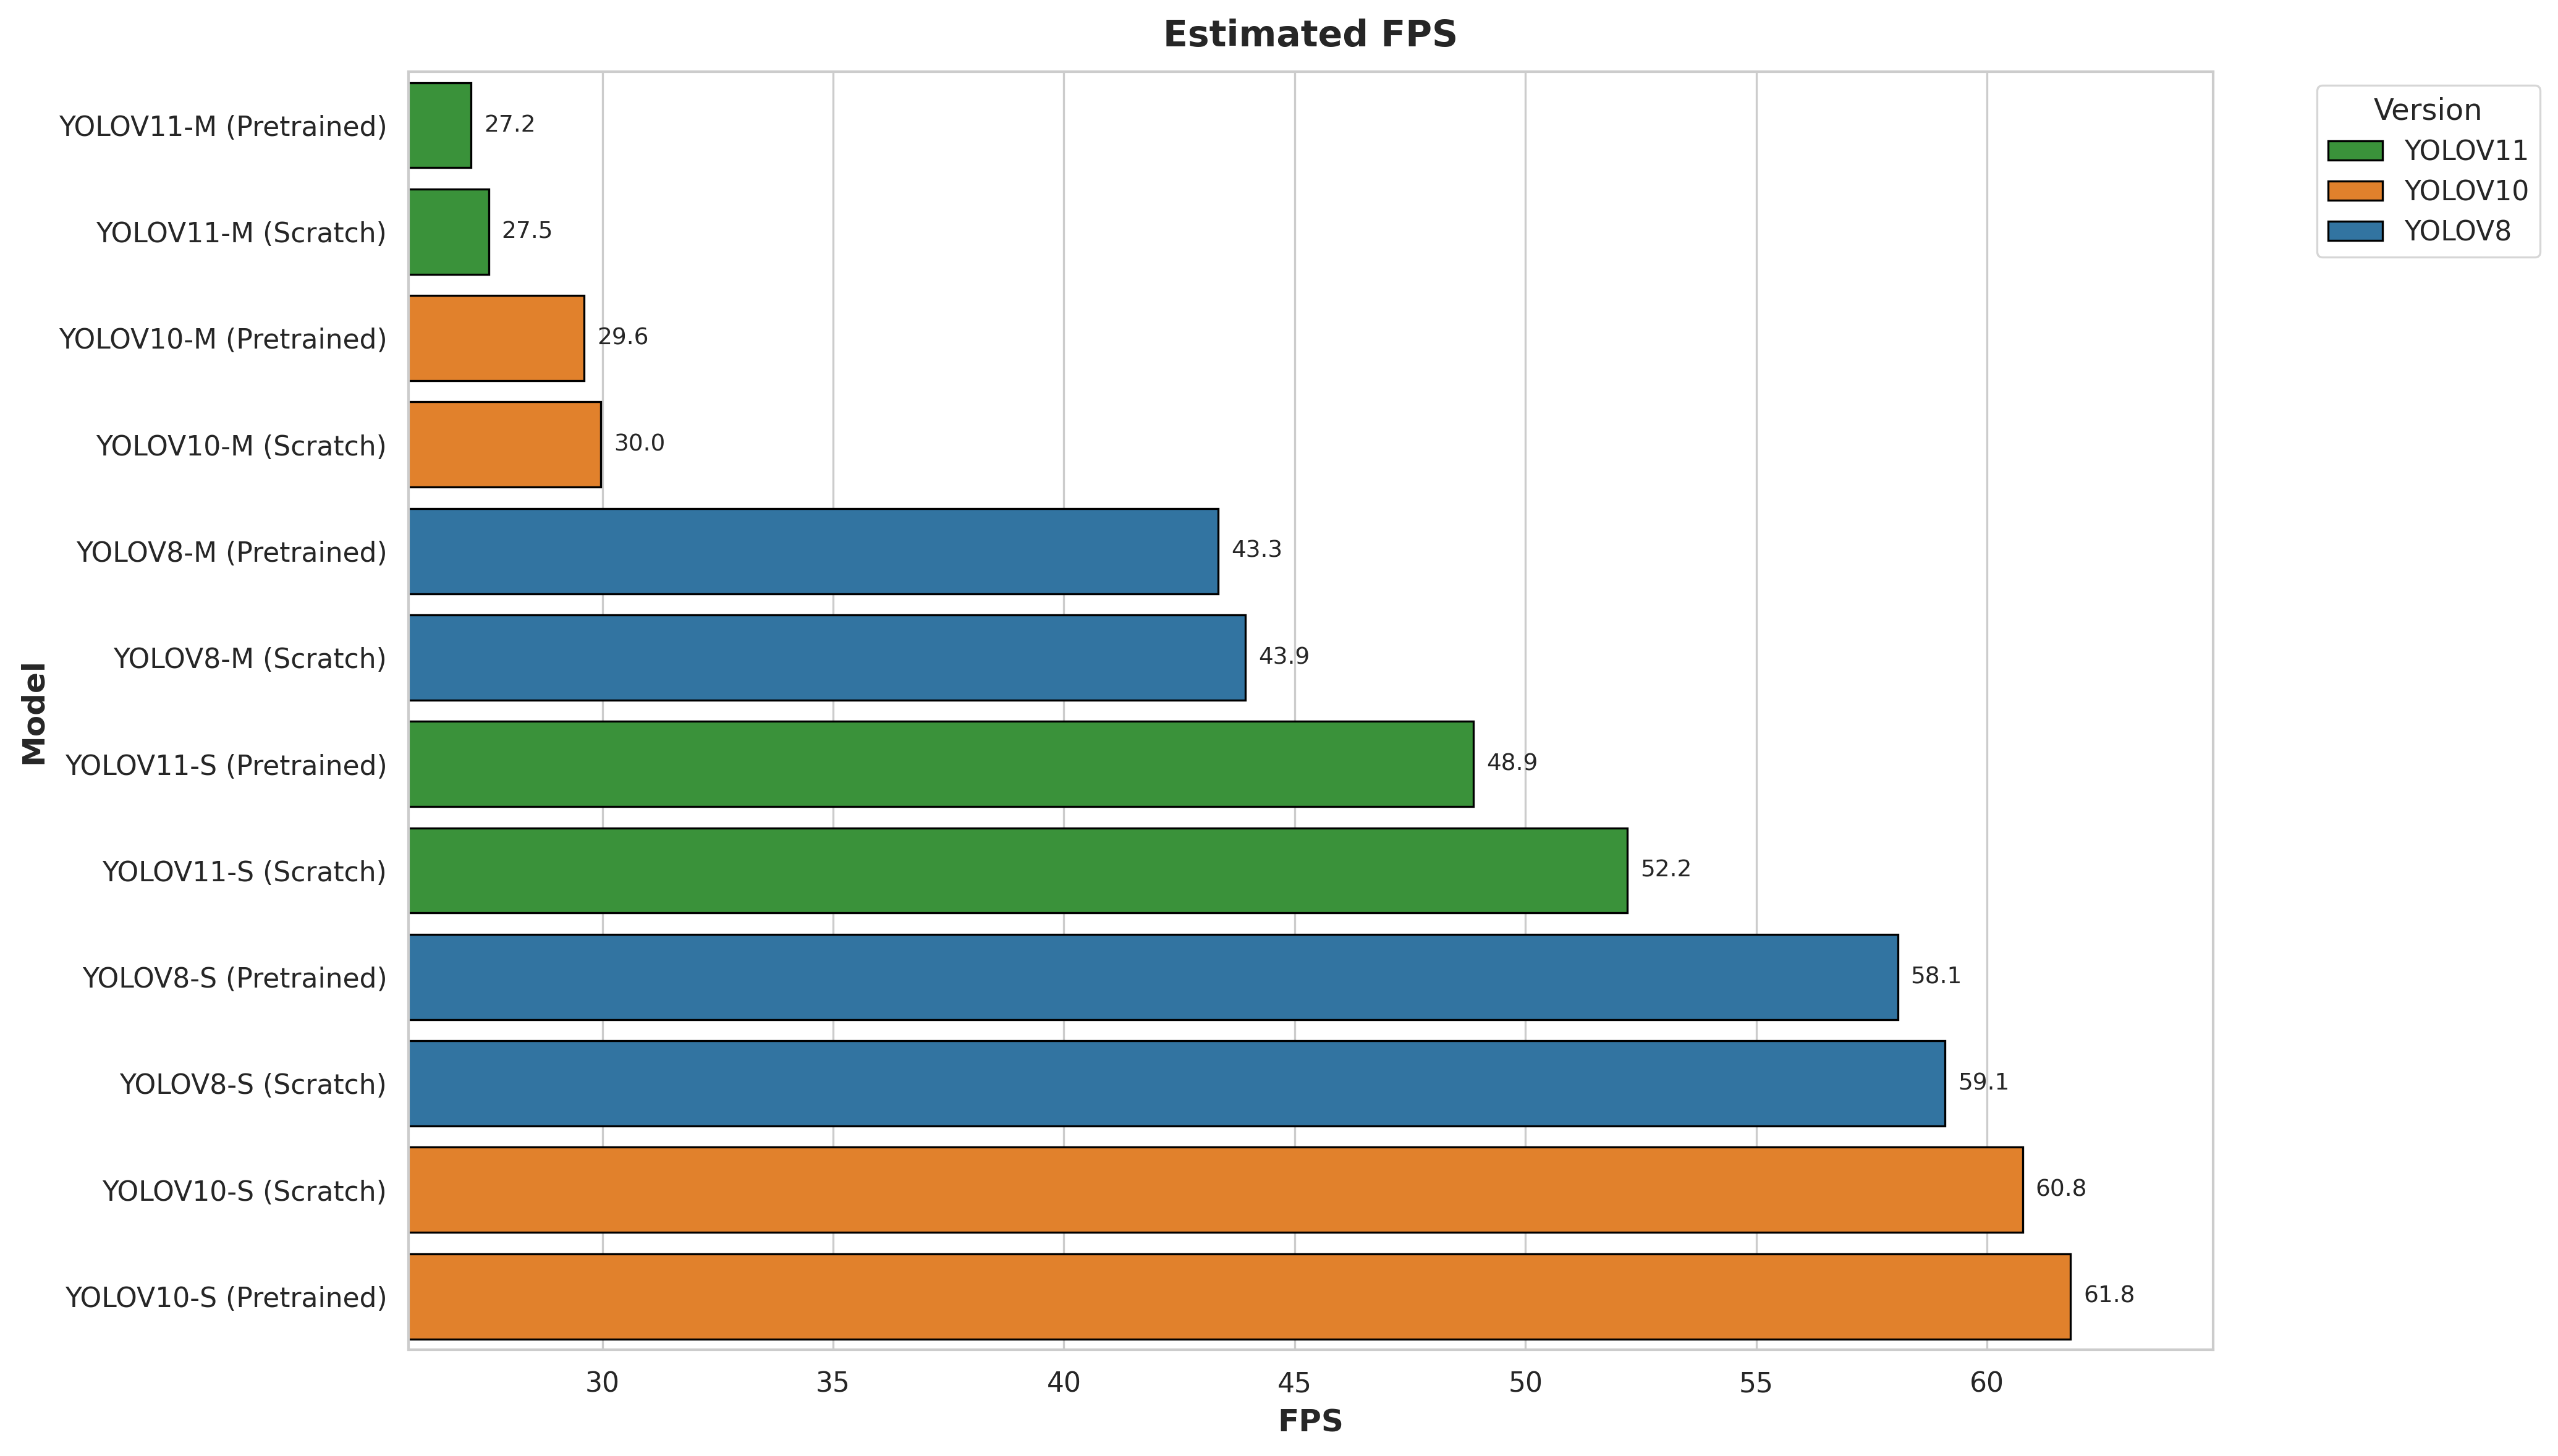

In [23]:
def plot_fps_only(df):
    """
    Plots Estimated FPS in a horizontal bar chart,
    sorted by FPS ascending (slowest first), zoomed,
    and with clear English titles and labels.
    """
    
    df_plot = df.copy()
    palette = {v: VERSION_COLORS.get(v, "#7f7f7f") for v in df['Version'].unique()}
    # Create combined model label
    df_plot['Model_Label'] = (
        df_plot['Version'] + "-" + df_plot['Size'] + 
        " (" + df_plot['Training'] + ")"
    )
    
    metric = 'FPS'
    title = 'Estimated FPS'
    
    # Sort ascending
    df_sorted = df_plot.sort_values(by=metric, ascending=True).reset_index(drop=True)
    
    # Zoom calculation
    min_val = df_sorted[metric].min()
    x_min = max(0, min_val * 0.95)
    
    # Create FIGURE
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Plot FPS horizontal barplot
    sns.barplot(
        ax=ax,
        data=df_sorted,
        x=metric,
        y='Model_Label',
        hue='Version',
        palette=palette,
        edgecolor="black",
        dodge=False
    )
    
    # Zoom if useful
    if min_val > 5:
        ax.set_xlim(x_min)
    
    # Titles
    ax.set_title(title, fontweight='bold', pad=10)
    ax.set_xlabel("FPS", fontweight='bold')
    ax.set_ylabel("Model", fontweight='bold')
    
    # Add numeric labels (1 decimal)
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f", padding=5, fontsize=9)
    
    # Legend
    ax.legend(title="Version", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.savefig("graphes/estimatedFPS.pdf", format="pdf", dpi=300, bbox_inches="tight")

    plt.show()


# Call the new function
plot_fps_only(results_df.copy())


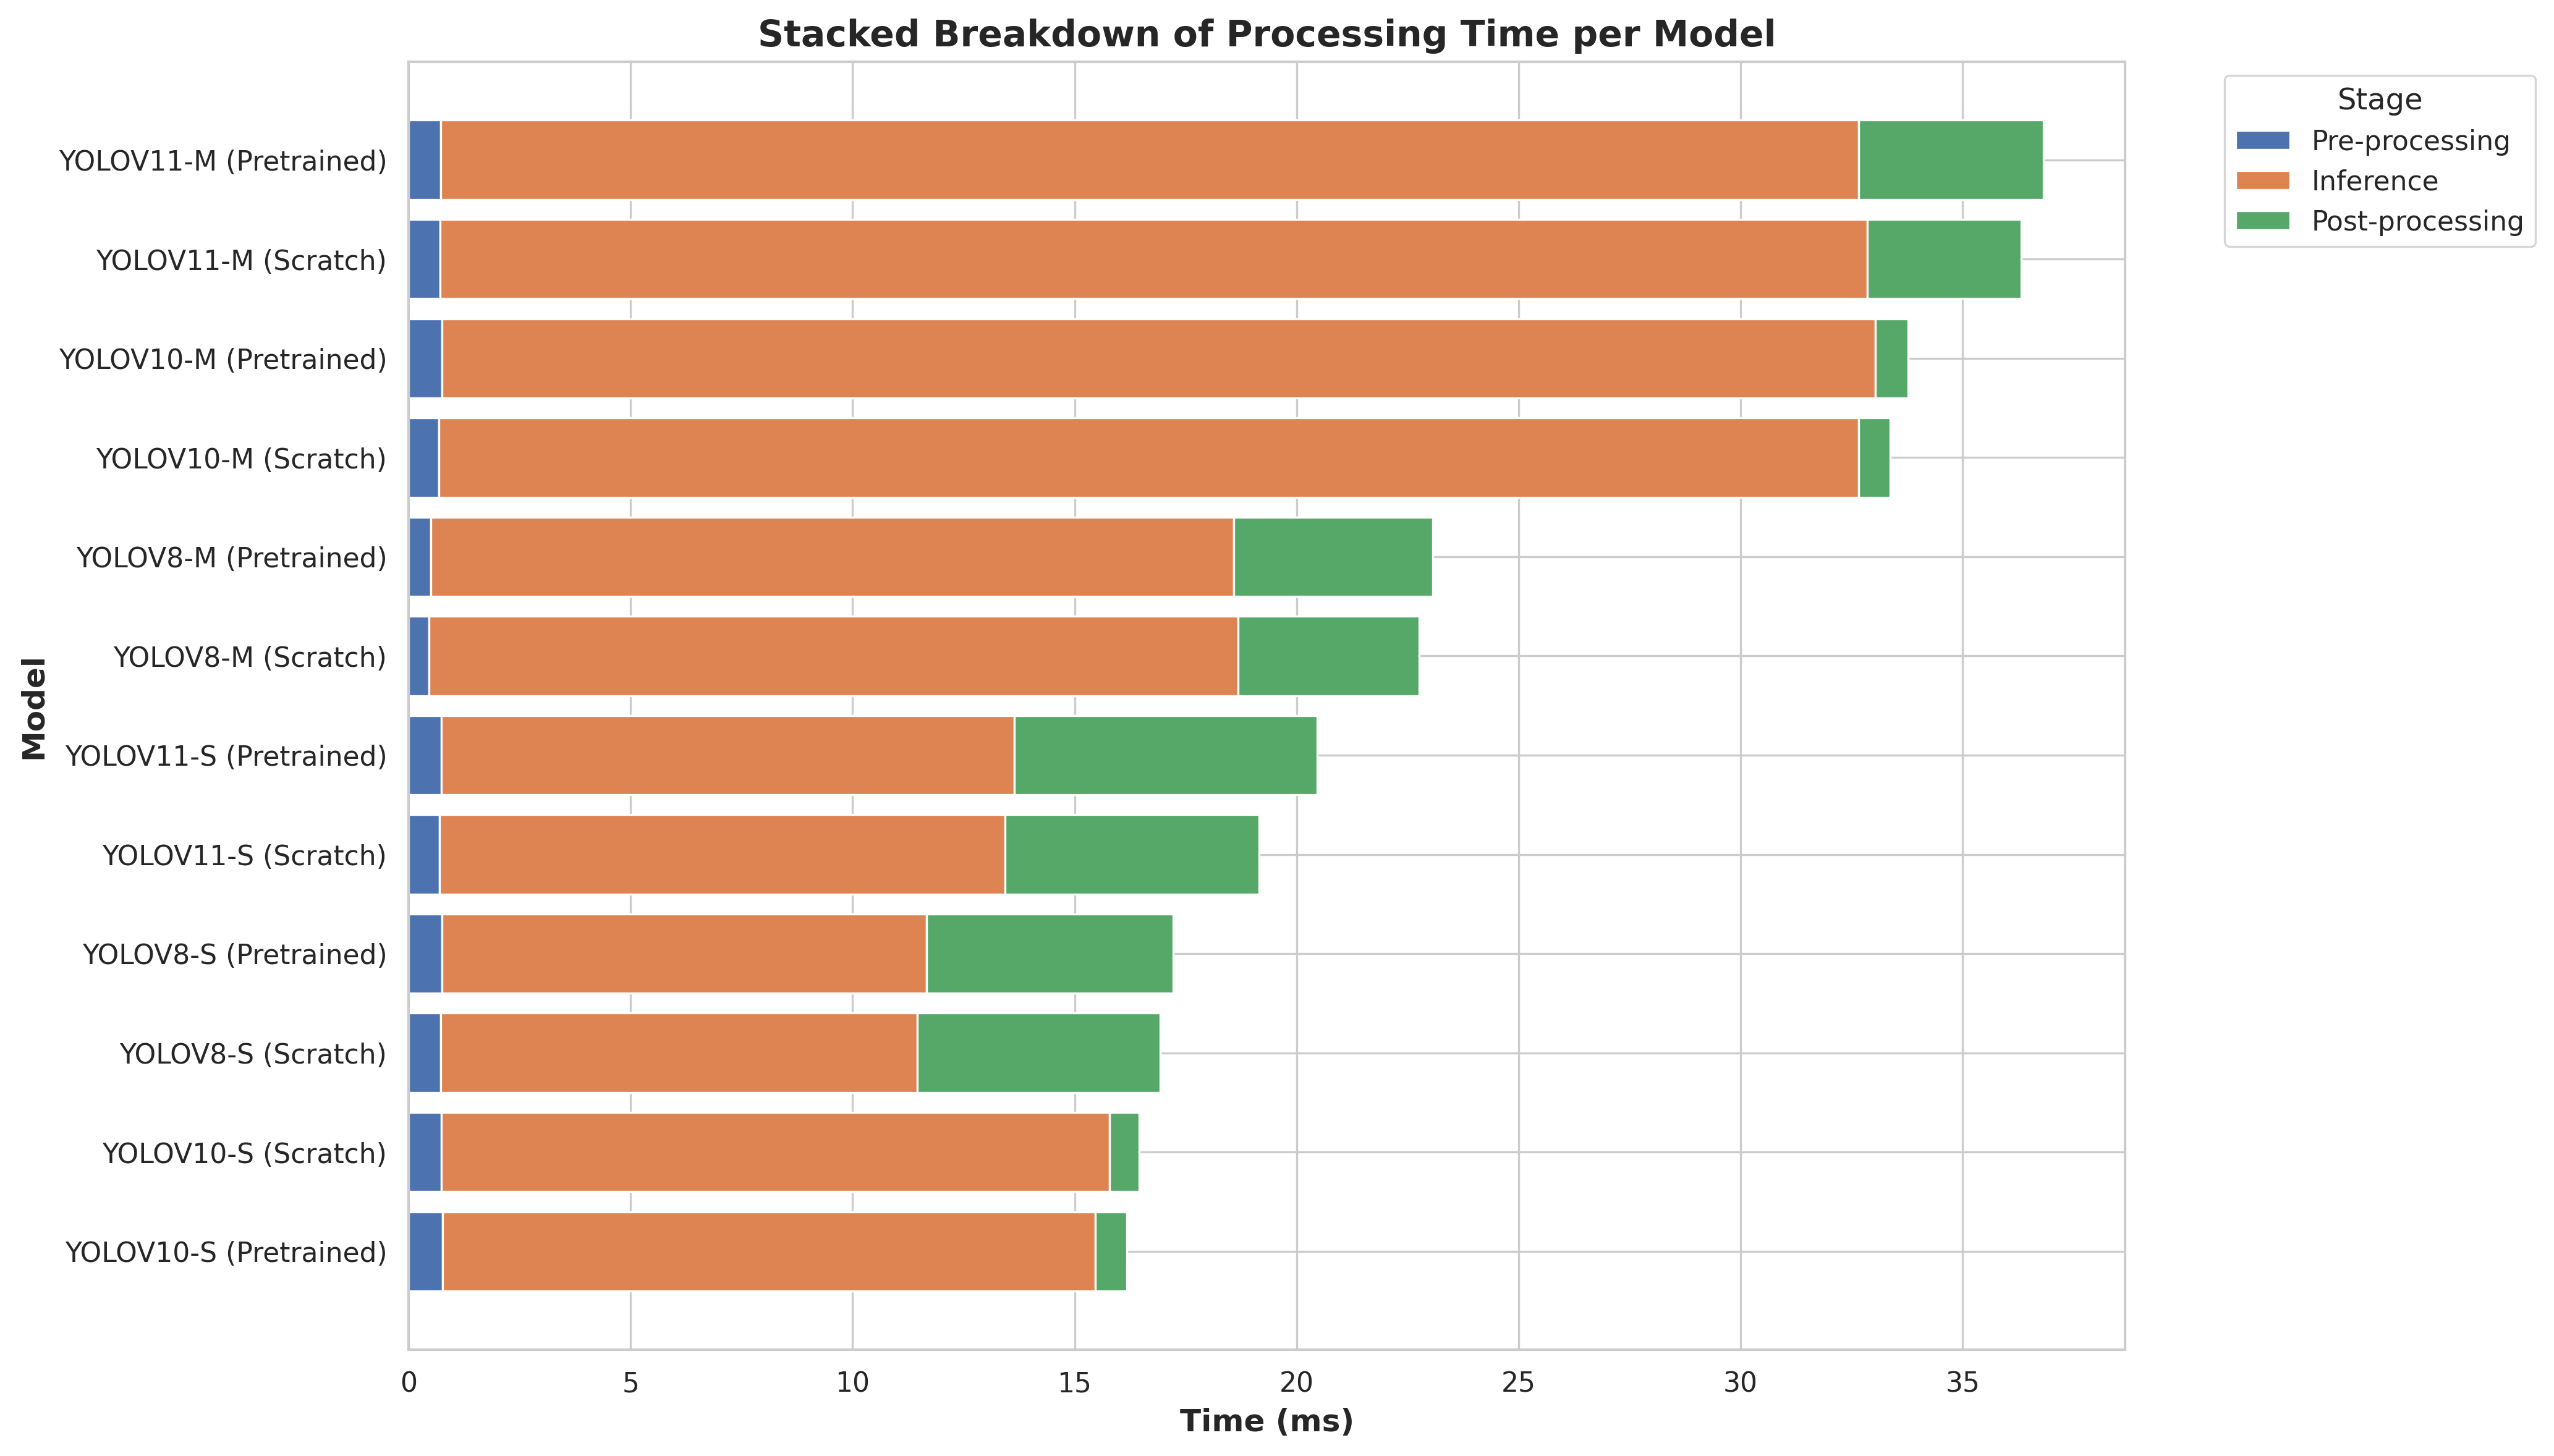

In [24]:
def plot_timing_stacked(df):
    """
    Montre le temps total par modèle, décomposé en Pre / Inference / Post
    via des barres horizontales empilées.
    """

    df_plot = df.copy()

    if "Model_Label" not in df_plot.columns:
        df_plot["Model_Label"] = (
            df_plot["Version"] + "-" + df_plot["Size"] + " (" + df_plot["Training"] + ")"
        )

    # On trie par temps total croissant
    df_plot = df_plot.sort_values("Total Time (ms)", ascending=True)

    models = df_plot["Model_Label"]
    pre = df_plot["Preprocessing Time (ms)"]
    inf = df_plot["Inference Time (ms)"]
    post = df_plot["Postprocessing Time (ms)"]

    plt.figure(figsize=(14, 8))

    # Pre
    plt.barh(models, pre, label="Pre-processing")
    # Inference (empilé sur pre)
    plt.barh(models, inf, left=pre, label="Inference")
    # Post (empilé sur pre + inf)
    plt.barh(models, post, left=pre + inf, label="Post-processing")

    plt.xlabel("Time (ms)", fontweight="bold")
    plt.ylabel("Model", fontweight="bold")
    plt.title("Stacked Breakdown of Processing Time per Model", fontweight="bold")
    plt.legend(title="Stage", bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.tight_layout()
    plt.savefig("graphes/processingTime.pdf", format="pdf", dpi=300, bbox_inches="tight")
    plt.show()

# Appel
plot_timing_stacked(results_df)


## Trade-off Vitesse vs Précision

Ce graphique permet de visualiser le compromis entre la performance (mAP) et la vitesse (FPS). Les meilleurs modèles se situent en haut à droite.

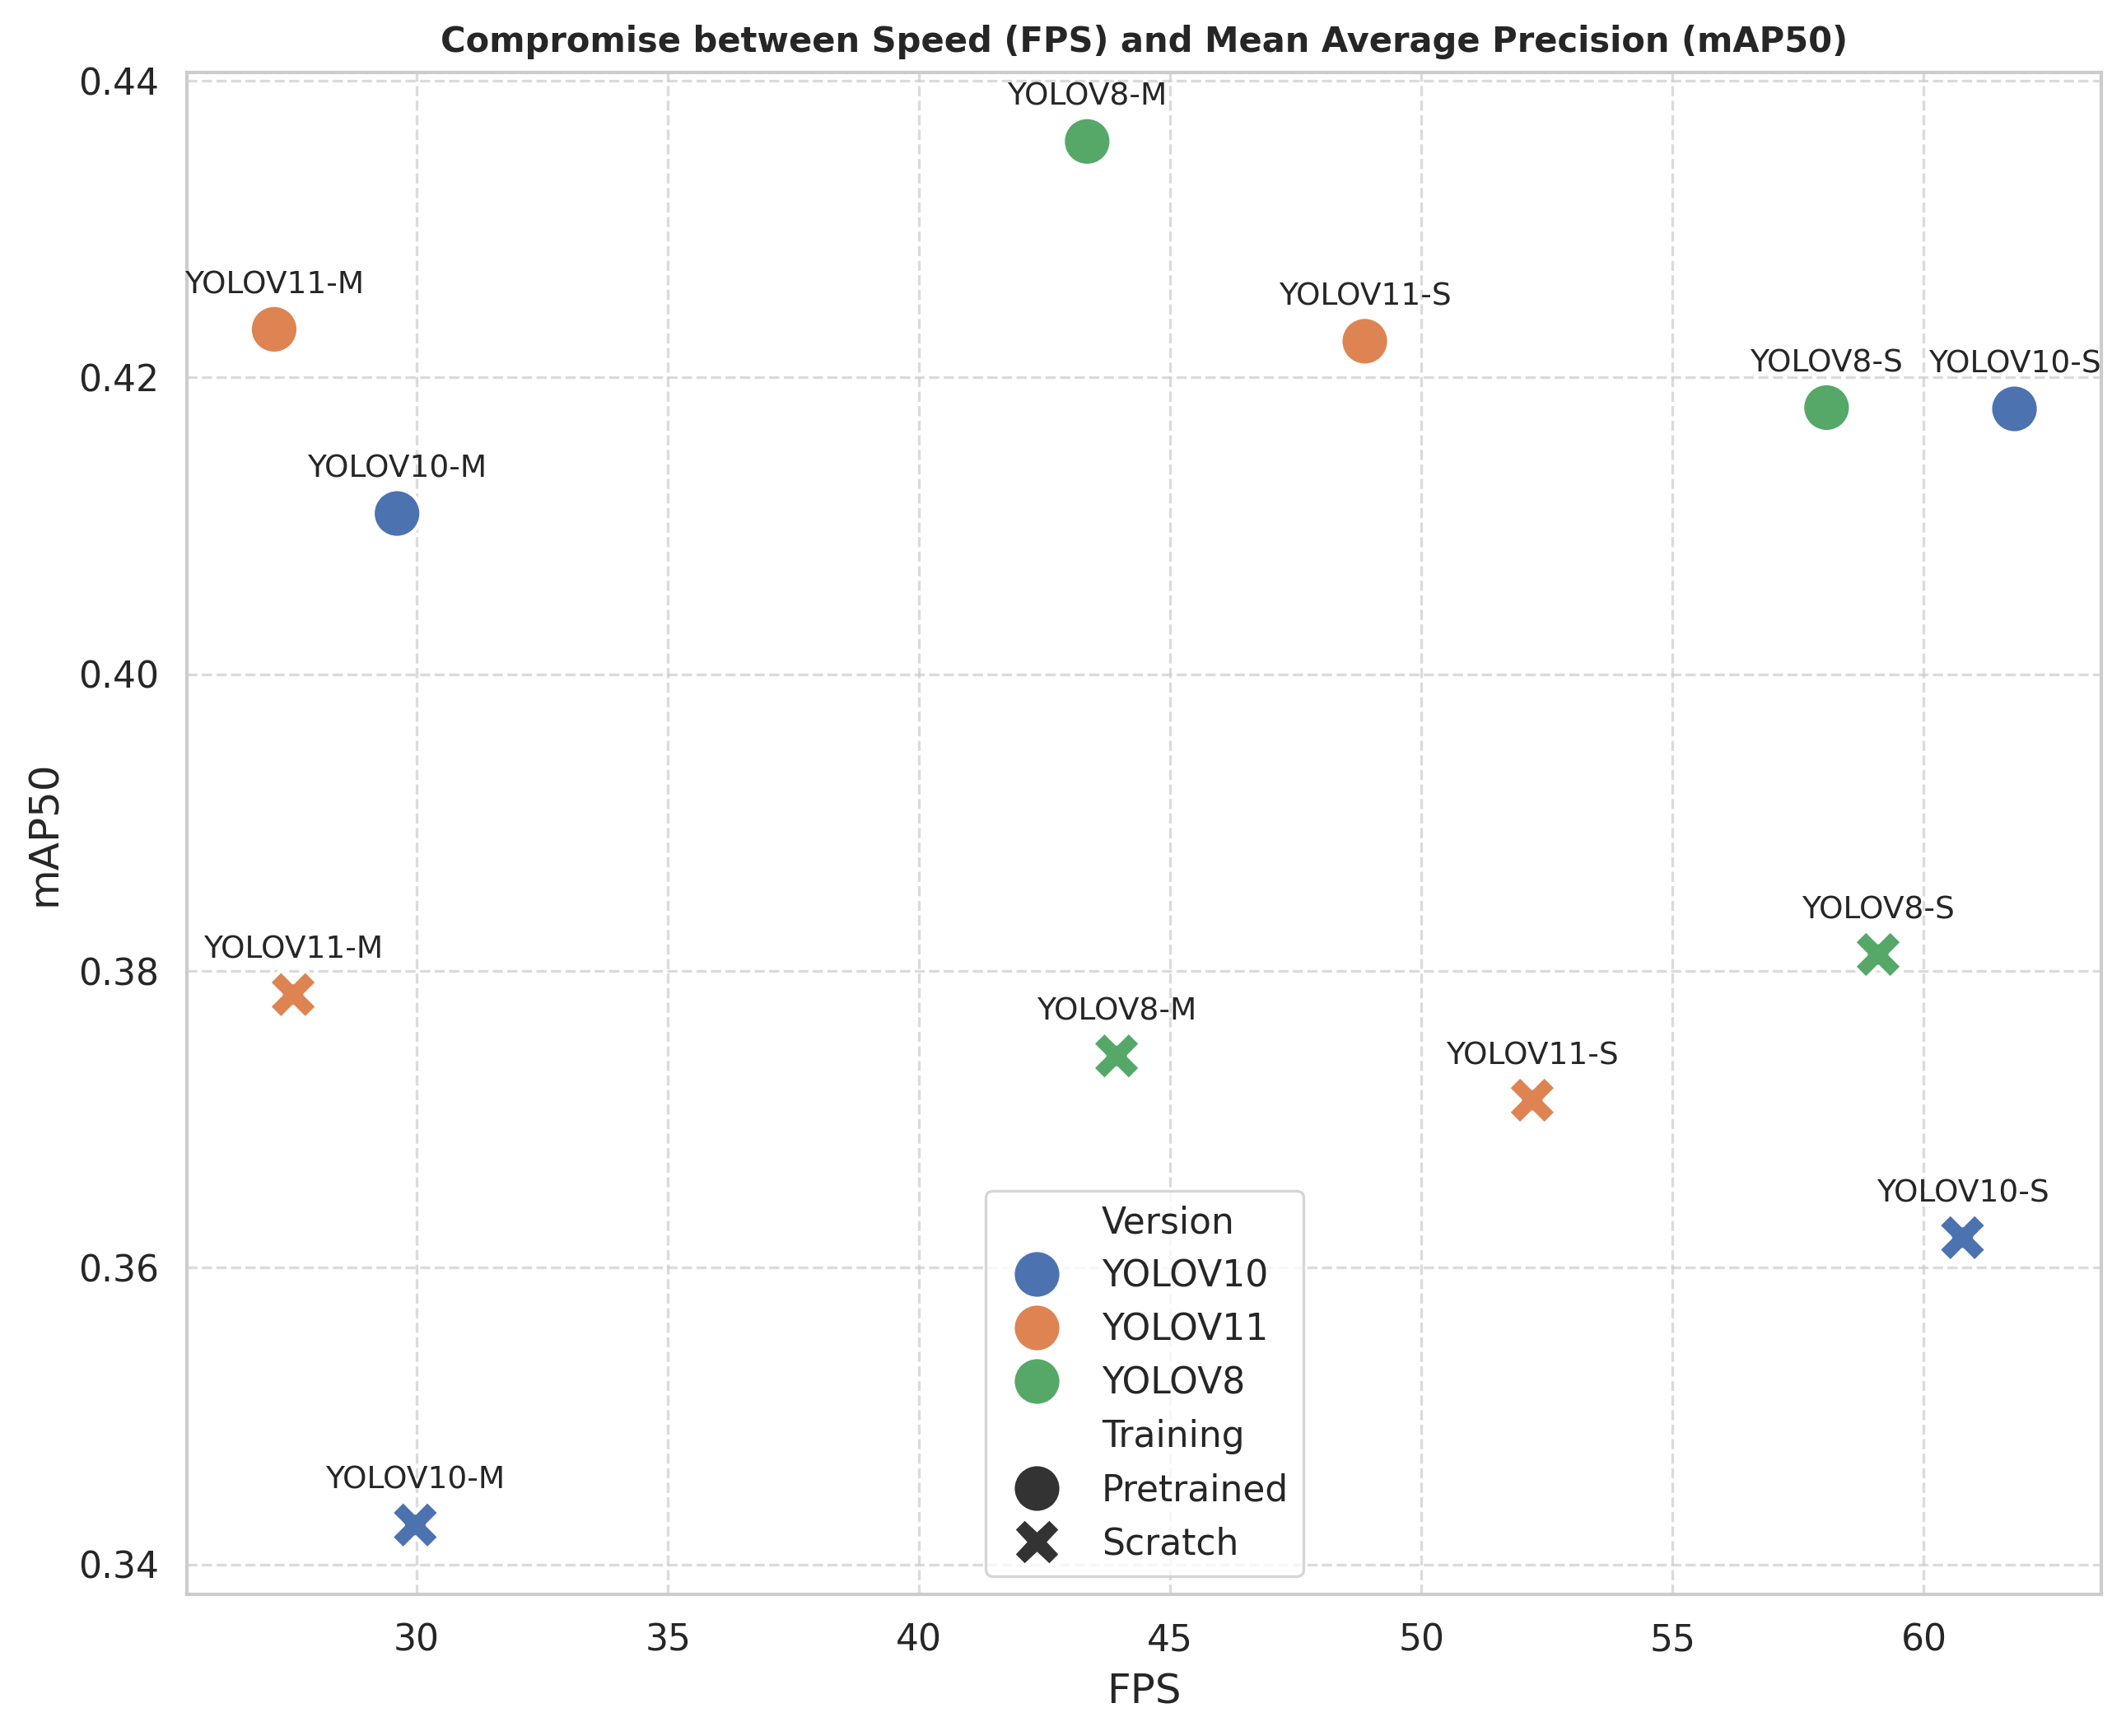

In [25]:
plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=results_df, 
    x='FPS', 
    y='mAP50', 
    hue='Version', 
    style='Training', 
    s=200, 
    palette="deep"
)

# Ajouter les labels AU-DESSUS
for i, row in results_df.iterrows():
    plt.text(
        row['FPS'], 
        row['mAP50'] + 0.002,   # ← petit offset vertical
        f"{row['Version']}-{row['Size']}", 
        fontsize=9, 
        ha='center',            # ← centré horizontalement
        va='bottom'             # ← placé juste au-dessus du point
    )

plt.title("Compromise between Speed (FPS) and Mean Average Precision (mAP50)", size=10, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("graphes/mAP50AndFPS.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()
